In [2]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

FACE_CASCADE = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def isImageValid(filename):
    try:
        im = Image.open(filename)
        return True
    except IOError:
#         print("the file is not an image")
        return False

def getFaceBoundary(img_path):
    img = cv2.imread(img_path)
    faces = FACE_CASCADE.detectMultiScale(img, 1.3, 5)
    
    if len(faces) == 0:
#         print('no face detected')
        return None
    faces = list(faces[0])
    return faces

def cropImage(boundaries, img_path, output_img_path):
    im = Image.open(img_path)
    im_width = im.size[0]
    im_height = im.size[1]
    left = boundaries[0]
    top = boundaries[1]
    right = left + boundaries[2]
    bottom = top + boundaries[3]
    
    diff_width = right - left
    diff_height = bottom - top
    diff = abs(diff_width - diff_height)
    if diff_width > diff_height:
        bottom += diff
        bottom = min(bottom, im_height)
    else:
        right += diff
        right = min(right, im_width)
    
    if max(diff_width, diff_height) < 200:
#         print('the image is too small')
        return None
    
    im1 = im.crop((left, top, right, bottom))
    
    newsize = (224, 224) 
    im2 = im1.resize(newsize)
    return im2

def processOneImage(img_path, output_img_path):
    if not isImageValid(img_path):
        return
    
    boundaries = getFaceBoundary(img_path)
    if boundaries is None:
        return
    
    im = cropImage(boundaries, img_path, output_img_path)
    if im is None:
        return
    return im
#     im.save(output_img_path, 'JPEG')
    
#     plt.imshow(im)
#     plt.show()

In [3]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np

IMAGE_SIZE = 224

MODEL_PATH = 'output_models/face-expression-model.h5'
MODEL = keras.models.load_model(MODEL_PATH)

In [4]:
def predictLabel(im):       
    im = im.resize((IMAGE_SIZE, IMAGE_SIZE))
    
    arr = np.array(im)
    # convert it to JPG if it is PNG
    if arr.shape[2] == 4:
        arr = arr[:, :, :3]   
    
    arr = np.expand_dims(arr, axis=0)
    arr = np.array(arr).astype(np.float32)
    return MODEL.predict(arr)

In [5]:
IMG_PATH = 'test_smile.png'

In [6]:
im = Image.open(IMG_PATH)

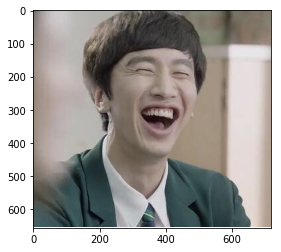

In [7]:
plt.imshow(im)

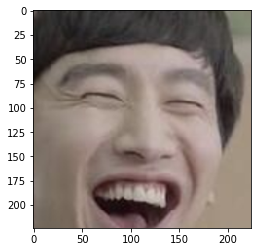

In [9]:
human_face_im = processOneImage(IMG_PATH, None)

plt.imshow(human_face_im)

In [11]:
predictLabel(human_face_im)

array([[1., 0.]], dtype=float32)